### 웹 크롤링
- 크롤링 절차
    - 1. 웹서비스 확인 : URL을 가져옴
    - 2. URL을 이용 -> request, response : json 포맷의 데이터를 가져옴 (str)
    - 3. json(str) -> dict(parsing) : DataFrame을 얻어냄
    
- naver stock data
    - kospi, kosdaq, usd(need login)
    
- 크롤링할 때 모바일 페이지가 있는지 먼저 확인해보는게 좋음
- referer : 요청하기 전 페이지
- user-agent : -> fake user-agent를 사용해서 랜덤하게 바꿔서 사용
- Query String Parameters
    - code : 요청 코드
    - pageSize : 한번에 가져오는 데이터 수
    - page : 해당 페이지

In [1]:
import requests

In [3]:
# 1. URL
code, page_size, page = "KOSPI", 20, 1
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code={}&pageSize={}&page={}".format(code, page_size, page)

url

'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1'

In [4]:
# 2. URL -> req, rep : JSON(str)
# post방식이면 get대신 post
response = requests.get(url)
response

<Response [200]>

In [6]:
response.text

'{"result":{"siseList":[{"cd":"KOSPI","dt":"20200626","ncv":2136.96,"cv":24.59,"cr":1.16,"ov":2137.47,"hv":2142.04,"lv":2115.25},{"cd":"KOSPI","dt":"20200625","ncv":2112.37,"cv":-49.14,"cr":-2.27,"ov":2130.45,"hv":2143.33,"lv":2112.37},{"cd":"KOSPI","dt":"20200624","ncv":2161.51,"cv":30.27,"cr":1.42,"ov":2145.93,"hv":2171.86,"lv":2143.91},{"cd":"KOSPI","dt":"20200623","ncv":2131.24,"cv":4.51,"cr":0.21,"ov":2149.13,"hv":2158.15,"lv":2110.51},{"cd":"KOSPI","dt":"20200622","ncv":2126.73,"cv":-14.59,"cr":-0.68,"ov":2126.38,"hv":2142.88,"lv":2122.1},{"cd":"KOSPI","dt":"20200619","ncv":2141.32,"cv":7.84,"cr":0.37,"ov":2153.09,"hv":2153.57,"lv":2108.91},{"cd":"KOSPI","dt":"20200618","ncv":2133.48,"cv":-7.57,"cr":-0.35,"ov":2134.35,"hv":2145.13,"lv":2120.29},{"cd":"KOSPI","dt":"20200617","ncv":2141.05,"cv":3.0,"cr":0.14,"ov":2133.18,"hv":2154.37,"lv":2105.26},{"cd":"KOSPI","dt":"20200616","ncv":2138.05,"cv":107.23,"cr":5.28,"ov":2091.09,"hv":2138.08,"lv":2079.02},{"cd":"KOSPI","dt":"20200615",

In [8]:
# 3. JSON(str) > dict형태로 parsing해줌 : DF
# .json : str -> dict
datas = response.json()["result"]["siseList"]
kospi_df = pd.DataFrame(datas)
kospi_df

,cd,dt,ncv,cv,cr,ov,hv,lv
0,KOSPI,20200626,2136.96,24.59,1.16,2137.47,2142.04,2115.25
1,KOSPI,20200625,2112.37,-49.14,-2.27,2130.45,2143.33,2112.37
2,KOSPI,20200624,2161.51,30.27,1.42,2145.93,2171.86,2143.91
3,KOSPI,20200623,2131.24,4.51,0.21,2149.13,2158.15,2110.51
4,KOSPI,20200622,2126.73,-14.59,-0.68,2126.38,2142.88,2122.10
5,KOSPI,20200619,2141.32,7.84,0.37,2153.09,2153.57,2108.91
6,KOSPI,20200618,2133.48,-7.57,-0.35,2134.35,2145.13,2120.29
7,KOSPI,20200617,2141.05,3.00,0.14,2133.18,2154.37,2105.26
8,KOSPI,20200616,2138.05,107.23,5.28,2091.09,2138.08,2079.02
9,KOSPI,20200615,2030.82,-101.48,-4.76,2114.41,2129.67,2030.82


In [17]:
def get_stock_data(code, page_size = 20, page = 1):
    url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code={}&pageSize={}&page={}".format(code, page_size, page)
    response = requests.get(url)
    datas = response.json()["result"]["siseList"]
    return pd.DataFrame(datas)

In [18]:
kospi_df = get_stock_data("KOSPI", 100)
kospi_df.tail(2)

,cd,dt,ncv,cv,cr,ov,hv,lv
98,KOSPI,20200205,2165.63,7.73,0.36,2177.26,2181.52,2154.88
99,KOSPI,20200204,2157.90,39.02,1.84,2121.22,2162.32,2120.53


In [19]:
kosdaq_df = get_stock_data("KOSDAQ", 100)
kosdaq_df.tail(2)

,cd,dt,ncv,cv,cr,ov,hv,lv
98,KOSDAQ,20200205,661.32,0.08,0.01,666.74,668.91,658.03
99,KOSDAQ,20200204,661.24,14.39,2.22,650.72,661.24,649.22


In [20]:
# USD 환율 데이터 가져오기

In [28]:
# 1. URL
code, page_size, page = "FX_USDKRW", 100, 1
url = "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?\
marketIndexCd={}&pageSize={}&page={}".format(code, page_size, page)

# 2. req, res, header 설정(cookie) : JSON
headers = {
    "cookie" : "npic=czUEP1OOqs83bT8KvvM79BOhqQNhLbF8GlXJkWPxDjXk2v7HQaqhkYtNzSvDdKS+CA==; NNB=H6RVQLD7U3UVU; ASID=cbcf161d000001653c2b15c500000050; _ga=GA1.2.1071442702.1553069743; PCID=15703329637921294943591; NRTK=ag#20s_gr#1_ma#-2_si#0_en#0_sp#0; nx_ssl=2; MM_NEW=1; NFS=2; MM_NOW_COACH=1; notice_new_account_171101=1; my_last_menu_id=noti; nid_inf=-1420766160; NID_AUT=QF/FZZNrUjkD/aqWpsAHMC8il4Oac0QS35T7Mdgh2XbDLyrjie6V3yK8UJmKEi+R; NID_JKL=DrTDWDucqZKVYb5NBDvpT05YX67Ed5LShqGJDdvQgQo=; NID_SES=AAABe8eZj8Kefdp2O6kSokjmtSR5WcuPA93cE0Aj/mfrR+PjyYaFqbEZkn+FlgEaxxKDPVl0kIn+J4TR/MPFo/DY1ApVYMsoqoiNBOHx/o7OB8N5o0qlMM5xHsa9Y4EhUaMfumc9PdfjlF2fcZ67BW0EwyJLQyzdacs+tAclCP8XVVSEZxcAwr4h/IqMQsWeK0ZxqcUtRh7szXzNUf9+le54asuKdMtbceO4+CXnJrg0VFP1Qo0m1q82UWdT6gXZL4IlivQA2qli/9YsBRQl5rLLCgfmOrhbYpmRZBNThwTQgYG6VLZl0NJ8yjJxzNsuksj/TItkXNBW6t+j2CRAbZCKr5eVDtY9BvgsalZgRWm7z2Ia3Mm64jwcfZnA8wmuzHQr45JeRzYk+B25FpdLXBUtMP1WDKY2iiOE5rhNm9NQljagUkLuAgFi3kuEzSouIJ2ie7liferEM3QxirYPWYY9d4+XEfgGi3DdtyaDGxSa1gwZzNd7VKixCqiQV5PBzmcogw==; page_uid=UYTLNdprvAKssitUTa0ssssstqK-211368; _naver_usersession_=uUKTA+VNNBnT0v6nFOLNwg==; JSESSIONID=632A455BB9E24202EDFDF525239915F9; BMR=; XSRF-TOKEN=254a8b6e-1936-49f4-b841-fc286ebc6394"
}
response = requests.get(url, headers = headers)

# 3. JSON > DF
datas = response.json()["result"]["marketIndexDay"]
usd_df = pd.DataFrame(datas)
usd_df.tail(2)

,dt,nv,cv,cr,cbv,csv,sv,rv
98,20200205,1184.5,-4.0,-0.34,1205.22,1163.78,1196.1,1172.9
99,20200204,1188.5,-5.5,-0.46,1209.29,1167.71,1200.1,1176.9


In [30]:
# 그래프 그리기
%matplotlib inline

In [33]:
from sklearn import preprocessing

ConversionError: Failed to convert value(s) to axis units: 0     20200626
10    20200612
20    20200529
30    20200515
40    20200428
50    20200413
60    20200330
70    20200316
80    20200302
90    20200217
Name: dt, dtype: object

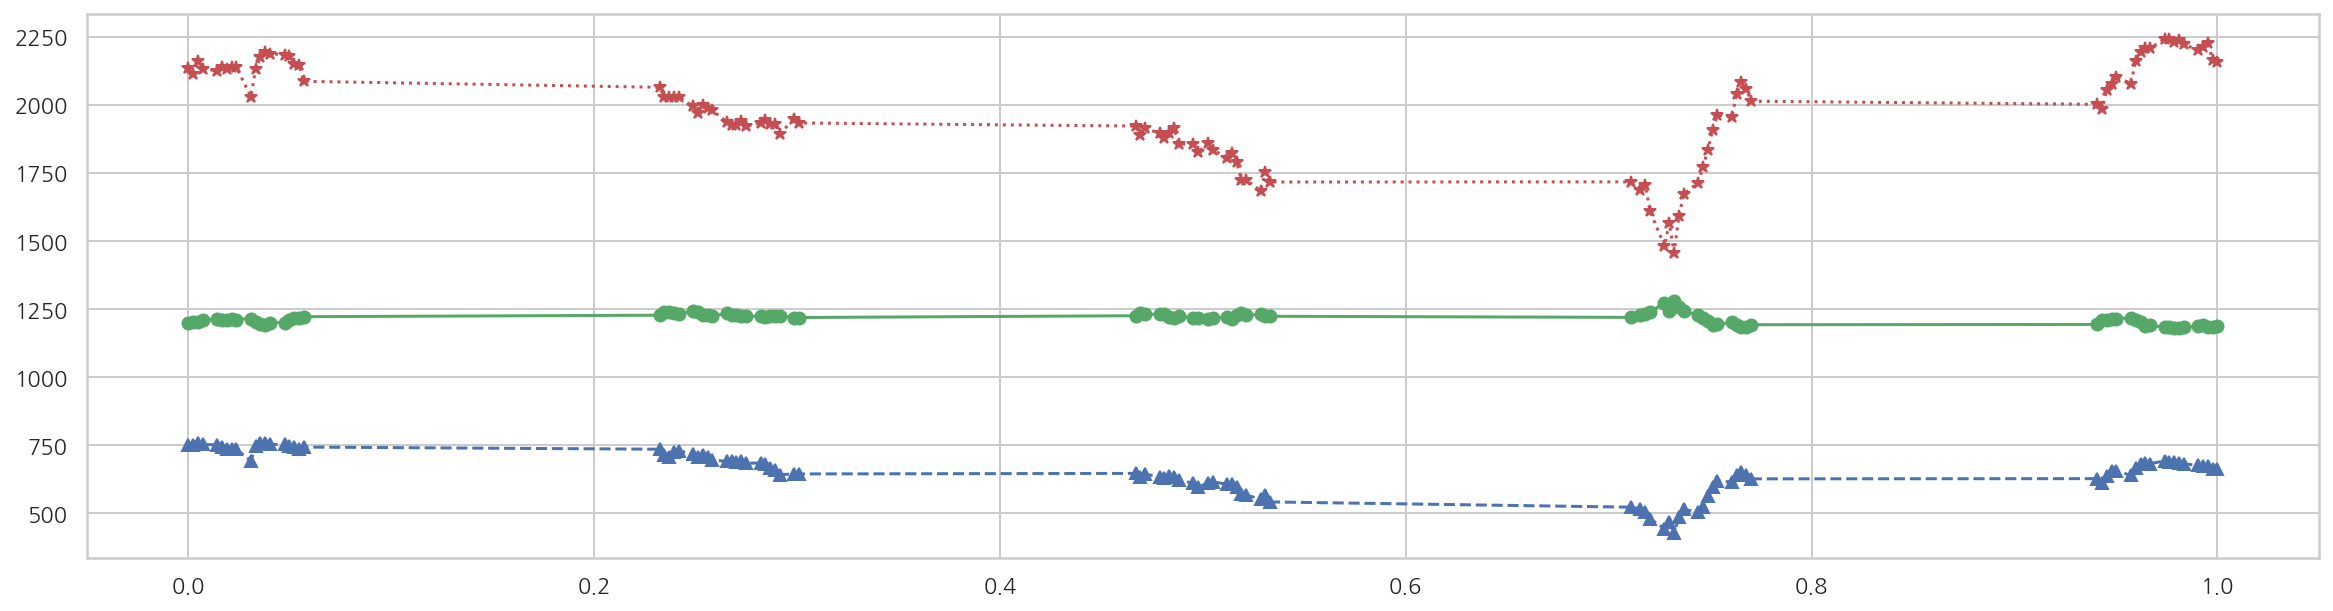

In [34]:
plt.figure(figsize = (20, 5), facecolor="1.")

data1 = preprocessing.minmax_scale(kospi_df["dt"][::-1])
data2 = preprocessing.minmax_scale(kosdaq_df["dt"][::-1])
data3 = preprocessing.minmax_scale(usd_df["dt"][::-1])

plt.plot(data1, kospi_df["ncv"], "r*:", label = "kospi")
plt.plot(data2, kosdaq_df["ncv"], "b^--", label="kosdaq")
plt.plot(data3, usd_df["nv"], "go-", label="usd")

step = len(kospi_df) // 10
plt.xticks(kospi_df[::step]["dt"])

plt.show()


In [ ]:
# min max scaling : 0 ~ 1 사이의 값으로 만들어줌